@ Gustavo Vazquez - UCU

# Ejemplo de aproximación lineal

Imagina que eres un agente inmobiliario o un analista de datos que trabaja en el sector de bienes raíces. Tienes acceso a un conjunto de datos históricos que contiene información sobre el tamaño de varias casas (en metros cuadrados) y sus precios de venta correspondientes (en miles de dólares).


In [1]:
#@title Generación datos

import numpy as np
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros configurables
seed = 42  # Semilla para reproducibilidad
num_puntos = 15  # Número de puntos generados
x_min = 30  # Valor mínimo de X
x_max = 230  # Valor máximo de X
pendiente = 1.8  # Pendiente de la relación lineal
intercepto = 50  # Intercepto de la relación lineal
ruido_std = 30  # Desviación estándar del ruido

# Generación de datos sintéticos
np.random.seed(seed)
x = np.random.rand(num_puntos, 1) * (x_max - x_min) + x_min  # Valores de X en el rango definido
x = x.astype(int)
y_real = pendiente * x + intercepto + np.random.randn(num_puntos, 1) * ruido_std  # Datos con ruido

# Crear DataFrame para mostrar los datos en forma de tabla

datos_df = pd.DataFrame({'Metros cuadrados': x.flatten(),'Precio (en miles de  $)': y_real.flatten()})

# Mostrar tabla
display(datos_df)



,Metros cuadrados,Precio (en miles de $)
0,104,220.058595
1,220,418.277515
2,176,288.423530
3,149,346.711090
4,61,184.293352
5,61,114.083720
6,41,110.958618
7,203,393.127795
8,150,298.899686
9,171,293.611380


Supongamos que necesitamos definir el valor de una casa de 120 metros cuadrados. Revisamos los datos que tenemos recopilados y no hay ninguna casa similar; sin embargo, podemos encontrar algún patrón que nos ayude a estimar el precio.

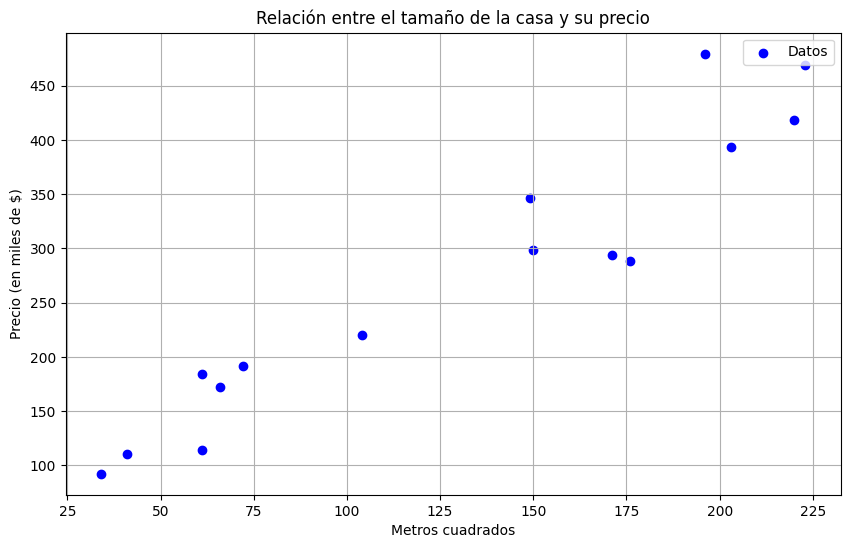

In [2]:
#@title Plot

plt.figure(figsize=(10, 6))
plt.scatter(x, y_real, label='Datos', color='blue')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio (en miles de $)')
plt.title('Relación entre el tamaño de la casa y su precio')
plt.grid(True)
plt.legend()
plt.show()


De manera intuitiva, estos datos siguen una relación lineal, de modo que podríamos aproximar sus valores mediante una recta. Cuál es la mejor recta que aproxime estos valores? La que hace mínimo el error que existe entre los precios reales de las casas y la recta que los aproxima. Naturalmente que la recta no representa en forma exacta a todos los datos (es decir, no pasa por encima de todos los puntos), pero sí es una forma realista de aproximarlos (ya que sabemos de antemano que ese fenómeno es razonable: a mayor cantidad de metros cuadrados, mayor el precio). La siguiente gráfica es de los mismos datos, pero ahora aproximados por una recta. Tienes el desafío de encontrar cuál es la mejor combinación de pendiente e intercepto (parámetros de una recta) de modo que ese error sea mínimo (puedes jugar con las barras que modifican esos parámetros).

In [ ]:
#@title Plot interactivo
# Función para actualizar la gráfica
def actualizar_grafica(pendiente_real, intercepto_real):
    y_pred = pendiente_real * x + intercepto_real
    mse = np.mean((y_real - y_pred) ** 2)

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y_real, label='Datos reales', alpha=0.7)
    plt.plot(x, y_pred, color='red', label='Aproximación lineal (recta)')

    # Agregar líneas de coordenadas
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=1)

    # Agregar cuadricula
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.title(f"Regresión Lineal: y = {pendiente_real:.2f}x + {intercepto_real:.2f}\nMSE: {mse:.2f}")
    plt.show()

    print(f"Pendiente utilizada: {pendiente_real:.2f}")
    print(f"Intercepto utilizado: {intercepto_real:.2f}")
    print(f"Error cuadrático medio (MSE): {mse:.2f}")

# Widgets interactivos
#pendiente_slider = widgets.FloatSlider(value=2.8, min=-5, max=6, step=0.1, description='Pendiente:')
#intercepto_slider = widgets.FloatSlider(value=100, min=-200, max=200, step=1, description='Intercepto:')
pendiente_slider = widgets.FloatText(value=10, description='Pendiente', disabled=False)
intercepto_slider = widgets.FloatText(value=100, description='Intercepto', disabled=False)

interactive_plot = widgets.interactive(actualizar_grafica, pendiente_real=pendiente_slider, intercepto_real=intercepto_slider)

# Mostrar los controles y la gráfica
display(interactive_plot)


interactive(children=(FloatText(value=10.0, description='Pendiente'), FloatText(value=100.0, description='Inte…

Lo primero que notaremos es la dificultad de encontrar una pendiente y un intercepto óptimo (parecería que hay muchas combinaciones para probar!!). Sin embargo para esto surge la técnica de cuadrados mínimos, que garantiza que el promedio de los errores al cuadrado es mínimo, y si es mínimo es entonces la mejor recta que podemos encontrar para respresentar esta información.

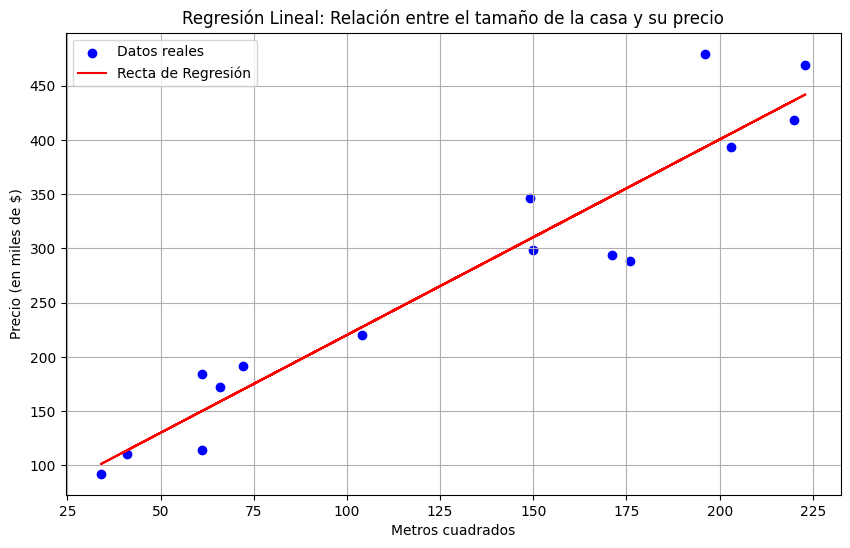

Pendiente óptima: 1.80
Intercepto óptimo: 39.90


In [4]:
#@title Encontrar valores óptimos
# compatibilizar x a 2D array para compatibilidad con cuadrados minimos
X = x.reshape(-1, 1)

# calculamos coeficientes
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
modelo.fit(X, y_real)

pendiente_calculada = modelo.coef_[0][0]
intercepto_calculado = modelo.intercept_[0]

# Predict
y_predicha = modelo.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y_real, label='Datos reales', color='blue')
plt.plot(x, y_predicha, color='red', label='Recta de Regresión')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio (en miles de $)')
plt.title('Regresión Lineal: Relación entre el tamaño de la casa y su precio')
plt.grid(True)
plt.legend()
plt.show()

# Print the calculated coefficients
print(f"Pendiente óptima: {pendiente_calculada:.2f}")
print(f"Intercepto óptimo: {intercepto_calculado:.2f}")

Volviendo al problema original... cuál sería el precio de una casa de 120 metros cuadrados?

Podemos usar la aproximación que hemos encontrado y = 39.9 +1.8x

Entonces, el valor que esta aproximación me dará es:

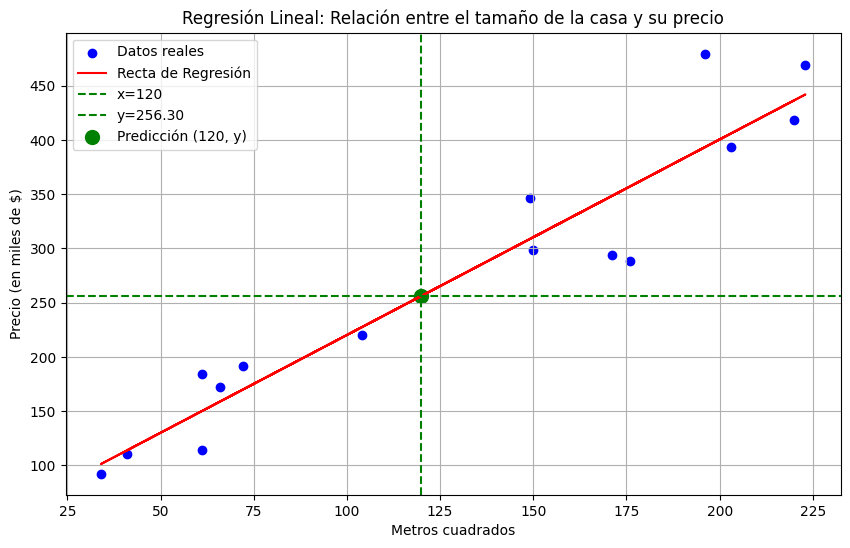

 256.30


In [5]:
#@title Predecir un nuevo valor
x_nuevo = np.array([[120]])
y_pred_nuevo = modelo.predict(x_nuevo)

# Plot con líneas adicionales
plt.figure(figsize=(10, 6))
plt.scatter(x, y_real, label='Datos reales', color='blue')
plt.plot(x, y_predicha, color='red', label='Recta de Regresión')

# Líneas en verde
plt.axvline(x=120, color='green', linestyle='dashed', label='x=120')
plt.axhline(y=y_pred_nuevo[0][0], color='green', linestyle='dashed', label=f'y={y_pred_nuevo[0][0]:.2f}')
plt.scatter(120, y_pred_nuevo, color='green', s=100, label='Predicción (120, y)')

# Etiquetas y título
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio (en miles de $)')
plt.title('Regresión Lineal: Relación entre el tamaño de la casa y su precio')
plt.grid(True)
plt.legend()
plt.show()

print(f" {y_pred_nuevo[0][0]:.2f}")

Esto nos dice que para una propiedad de 120 metros el **modelo** indica que, según la tendencia del resto de los datos, el valor sería de 256.3 (en miles de pesos).